In [92]:
address2

'730 Bourbon St, New Orleans'

In [2]:
import csv
import dill
from datetime import datetime
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
geolocator = Nominatim()
import matplotlib
import matplotlib.pyplot as plt

In [3]:
year=str(2013)
filename='Calls_for_Service_'+year+'.csv'
csvfile = open(filename, 'r')
temp=[]
fieldnames = ("NOPD_Item","Type_","TypeText","Priority","MapX","MapY","TimeCreate","TimeDispatch","TimeArrive",
              "TimeClosed","Disposition",
             "DispositionText","BLOCK_ADDRESS","Zip","PoliceDistrict","Location")
reader = csv.DictReader(csvfile, fieldnames)
for row in reader:
    temp.append(row)
List2013=temp[1:]

In [4]:
year=str(2014)
filename='Calls_for_Service_'+year+'.csv'
csvfile = open(filename, 'r')
temp=[]
fieldnames = ("NOPD_Item","Type_","TypeText","Priority","InitialType","InitialTypeText","InitialPriority","MapX","MapY","TimeCreate",
              "TimeDispatch","TimeArrive",
              "TimeClosed","Disposition","DispositionText",
              "SelfInitiated","Beat","BLOCK_ADDRESS","Zip","PoliceDistrict","Location")
reader = csv.DictReader(csvfile, fieldnames)
for row in reader:
    temp.append(row)
List2014=temp[1:]

In [5]:
year=str(2015)
filename='Calls_for_Service_'+year+'.csv'
csvfile = open(filename, 'r')
temp=[]
fieldnames = ("NOPD_Item","Type_","TypeText","Priority","InitialType","InitialTypeText","InitialPriority","MapX","MapY","TimeCreate",
              "TimeDispatch","TimeArrive",
              "TimeClosed","Disposition","DispositionText",
              "SelfInitiated","Beat","BLOCK_ADDRESS","Zip","PoliceDistrict","Location")
reader = csv.DictReader(csvfile, fieldnames)
for row in reader:
    temp.append(row)
List2015=temp[1:]

In [6]:
year=str(2016)
filename='Calls_for_Service_'+year+'.csv'
csvfile = open(filename, 'r')
temp=[]
fieldnames = ("NOPD_Item","Type_","TypeText","Priority","InitialType","InitialTypeText","InitialPriority","MapX","MapY","TimeCreate",
              "TimeDispatch","TimeArrive",
              "TimeClosed","Disposition","DispositionText",
              "SelfInitiated","Beat","BLOCK_ADDRESS","Zip","PoliceDistrict","Location")
reader = csv.DictReader(csvfile, fieldnames)
for row in reader:
    temp.append(row)
List2016=temp[1:]

In [7]:
year=str(2017)
filename='Calls_for_Service_'+year+'.csv'
csvfile = open(filename, 'r')
temp=[]
fieldnames = ("NOPD_Item","Type_","TypeText","Priority","InitialType","InitialTypeText","InitialPriority","MapX","MapY","TimeCreate",
              "TimeDispatch","TimeArrive",
              "TimeClosed","Disposition","DispositionText",
              "SelfInitiated","Beat","BLOCK_ADDRESS","Zip","PoliceDistrict","Location")
reader = csv.DictReader(csvfile, fieldnames)
for row in reader:
    temp.append(row)
List2017=temp[1:]

In [8]:
def timeconvert(timediff):
    if timediff:
        timeminsec=[timediff.days*24*60+timediff.seconds/60,timediff.seconds%60]
    else:
        timeminsec='InDef'
    return timeminsec

In [9]:
def timediff(Arrive,Create):
    if Arrive=='':
        gap=[]
    else:
        gap=datetime.strptime(Arrive,'%m/%d/%Y %I:%M:%S %p')-datetime.strptime(Create,'%m/%d/%Y %I:%M:%S %p')
    
    return gap

In [10]:
def filterlist(l):
    newlist=[{'TypeText':i['TypeText'],'TimeCreate':datetime.strptime(i['TimeCreate'],'%m/%d/%Y %I:%M:%S %p'), 
              'Response':
            timeconvert(timediff(i['TimeArrive'],i['TimeCreate']))
             ,'Location':i['Location']
             } for i in l]
    return newlist

In [11]:
L2017=filterlist(List2017)      #L2017: needed information from the full list (List2017)
L2016=filterlist(List2016)
L2015=filterlist(List2015)
L2014=filterlist(List2014)
L2013=filterlist(List2013)
ListAll=L2013+L2014+L2015+L2016+L2017

In [12]:
TableAll=pd.DataFrame(ListAll)

In [13]:
#import pickle
#TableAll.to_pickle('DataFiveYears.pickle')

In [14]:
TableAll[100:120]

,Location,Response,TimeCreate,TypeText
100,"(29.99478381521956, -90.06140819524536)","[9, 7]",2013-01-01 00:32:39,DISCHARGING FIREARM
101,"(29.954711288829333, -90.06914767128782)","[0, 13]",2013-01-01 00:33:15,COMPLAINT OTHER
102,"(30.00541375875009, -90.02312031579173)",InDef,2013-01-01 00:32:05,RECKLESS DRIVING
103,"(30.005815042781357, -90.0595265543836)",InDef,2013-01-01 00:34:16,"BURGLAR ALARM, SILEN"
104,"(29.923584055386364, -90.08093872975894)",InDef,2013-01-01 00:35:48,DISCHARGING FIREARM
105,"(29.964135701270372, -90.09607586645473)",InDef,2013-01-01 00:36:32,TRAFFIC INCIDENT
106,"(9.235500542976004E-7, -0.000002292984766499941)","[0, 2]",2013-01-01 00:36:43,MEDICAL
107,"(29.966584611565143, -90.06960047104681)","[4, 21]",2013-01-01 00:34:57,SIMPLE CRIMINAL DAMA
108,"(29.97676406192181, -90.08621574947192)",InDef,2013-01-01 00:36:29,DISCHARGING FIREARM
109,"(29.98276111296752, -90.10338824613962)","[16, 41]",2013-01-01 00:37:09,DISTURBANCE (OTHER)


In [15]:
TableAll.TimeCreate[0]

Timestamp('2012-12-31 23:59:34')

In [16]:
TableAll[0:10]

,Location,Response,TimeCreate,TypeText
0,"(29.960019973022543, -90.02123092953371)","[24, 23]",2012-12-31 23:59:34,DISCHARGING FIREARM
1,"(29.92009950776069, -89.97771660629039)","[14, 46]",2012-12-31 23:59:49,DISCHARGING FIREARM
2,"(29.956300375853115, -90.06310829672566)",InDef,2013-01-01 00:00:22,SHOPLIFTING
3,"(29.961109350200267, -90.09359315760538)","[0, 4]",2013-01-01 00:00:29,COMPLAINT OTHER
4,"(29.991690537674508, -90.11911498388514)",InDef,2013-01-01 00:00:22,"BURGLAR ALARM, SILEN"
5,"(29.920379287323264, -90.11005402142804)","[36, 42]",2012-12-31 23:59:56,FIREWORKS
6,"(29.98104990280563, -90.0742281157458)","[2, 17]",2013-01-01 00:01:04,COMPLAINT OTHER
7,"(29.945420710183157, -90.04634357383449)","[6, 18]",2013-01-01 00:00:51,DISCHARGING FIREARM
8,"(29.971456907990003, -90.0767086070737)",InDef,2013-01-01 00:01:55,DISCHARGING FIREARM
9,"(29.938141661002234, -90.07968881566954)","[3, 6]",2013-01-01 00:01:54,DISCHARGING FIREARM


In [91]:
pd.DataFrame(list(set(TableAll.TypeText)))

,0
0,DOMESTIC DISTURBANCE
1,SIMPLE RAPE MALE VIC
2,UNDERAGE DRINKING VI
3,HIT & RUN
4,HIT & RUN CITY VEHICLE
5,DESECRATION OF GRAVES
6,ABANDONED VEHICLE
7,TRAFFIC CONGESTION
8,AGGRAVATED BATTERY
9,RESIDENCE CHECK


In [18]:
#Type 1: walking problems---'Assault','Rape','Robbery','Battery','Homicide','PickPocket','Theft'
#Type 2: housing problems---'Burglary','Burglar'
#Type 3: driving problems---'Auto','Carjacking','Hit & Run', 'Traffic incidents'

In [19]:
#testcase                     #b is the university square
a=(29.936217,-90.128052)
b=(29.929783,-90.132808)
print(great_circle(a, b).miles)

0.528086395442


In [20]:
#testcase_2
b=(29.929783,-90.132808)
c=(29.937338,-90.126856)
print(great_circle(b, c).miles)

0.632233994067


In [21]:
type(b)

tuple

In [22]:
#testcase_3
Location='210 Broadway, New Orleans'
loctemp=geolocator.geocode(Location)
coord=(loctemp.latitude, loctemp.longitude)
coord

(29.9299008979592, -90.1327338979592)

In [23]:
len(TableAll)*1.0/24/365/5/60   #two millions of phone calls in the past five years, averaging about ONE 911 call each minute

0.8340966514459665

In [24]:
#aa=pd.DataFrame([{'Location':a}]*len(TableAll))

In [25]:
TableAll.Location[0:10]

0    (29.960019973022543, -90.02123092953371)
1     (29.92009950776069, -89.97771660629039)
2    (29.956300375853115, -90.06310829672566)
3    (29.961109350200267, -90.09359315760538)
4    (29.991690537674508, -90.11911498388514)
5    (29.920379287323264, -90.11005402142804)
6      (29.98104990280563, -90.0742281157458)
7    (29.945420710183157, -90.04634357383449)
8     (29.971456907990003, -90.0767086070737)
9    (29.938141661002234, -90.07968881566954)
Name: Location, dtype: object

In [26]:
great_circle((29.960019973022543, -90.02123092953371),a)

Distance(10.6298670768)

In [27]:
type(TableAll.Location)

pandas.core.series.Series

In [28]:
a=(29.936217,-90.128052)
Radius=1

In [29]:
great_circle(TableAll.Location[0],a)

Distance(10.6298670768)

In [30]:
great_circle((TableAll.Location[0]),a)<11

True

In [31]:
a

(29.936217, -90.128052)

In [32]:
flag=[]
for sth in TableAll.Location:
    try:
        flag.append(great_circle(sth,a).miles<=radius)
    except:
        flag.append(1==0)
        

In [33]:
test=TableAll[flag]

In [34]:
#test

In [35]:
#test=TableAll[TableAll.apply(lambda x: great_circle(x['TableAll.Location'],a) <Radius)]

In [36]:
def TableFilter(Location, R):    
    #Radius is in units of miles and is the pool for predictions
    #Location is in coordinates or street adress
    if isinstance(Location, str):
        loctemp=geolocator.geocode(Location)
        coord=(loctemp.latitude, loctemp.longitude)
    else:
        coord=Location
    
    #H=datetime.strptime(Time,'%m/%d/%Y %I:%M:%S %p').hour
    #D=datetime.strptime(Time,'%m/%d/%Y %I:%M:%S %p').weekday()
    
    flag=[]
    for sth in TableAll.Location:
        try:
            flag.append(great_circle(sth,coord).miles < R)
        except:
            flag.append(1==0)
            
    TableFiltered=TableAll[flag]
    
    return TableFiltered

In [37]:
test=TableFilter('210 Broadway, New Orleans',1)

In [38]:
Location='210 Broadway, New Orleans'
loctemp=geolocator.geocode(Location)
coord=(loctemp.latitude, loctemp.longitude)
great_circle(coord,(29.93615175, -90.13249778)).miles<=1

True

In [39]:
coord

(29.9299008979592, -90.1327338979592)

In [40]:
test[-20:-10]

,Location,Response,TimeCreate,TypeText
2189115,"(29.9284967, -90.11999732)","[345, 2]",2017-12-29 12:09:29,HIT & RUN
2189140,"(29.92349991, -90.12002187)",InDef,2017-12-29 12:34:19,THEFT BY FRAUD
2189521,"(29.9289634, -90.11824861)","[4, 0]",2017-12-29 19:07:27,HOLD UP ALARM
2189639,"(29.925896, -90.1335055)","[7, 17]",2017-12-29 20:57:40,COMPLAINT OTHER
2189902,"(29.92771766, -90.13357425)","[17, 35]",2017-12-30 03:08:31,COMPLAINT OTHER
2189976,"(29.92222311, -90.12294204)","[0, 6]",2017-12-30 07:54:31,BUSINESS CHECK
2190022,"(29.9425177, -90.12474522)","[8, 21]",2017-12-30 09:02:44,"BURGLAR ALARM, SILENT"
2190153,"(29.93237145, -90.12007842)","[0, 8]",2017-12-30 12:19:50,TRAFFIC INCIDENT
2190338,"(29.92465744, -90.12220026)","[9, 1]",2017-12-30 15:40:33,"BURGLAR ALARM, SILENT"
2190452,"(29.92331898, -90.11871815)","[4, 11]",2017-12-30 17:29:03,DISCHARGING FIREARM


In [41]:
#Type 1: walking problems---'Assault','Rape','Robbery','Battery','Homicide','PickPocket','Theft'
#Type 2: housing problems---'Burglary','Burglar'
#Type 3: driving problems---'Auto','Carjacking','Hit & Run', 'Traffic incidents'
def Walking(Table):
    flag=[]
    for i in Table.TypeText:
        sth=str(i).lower()
        try:
            flag.append('assault' in sth or 'rape' in sth or 'robbery' in sth or 'battery' in sth 
                        or 'homicide' in sth) #or 'pickPocket' in sth or 'theft' in sth)
        except:
            flag.append(1==0)
    
    return Table[flag]

In [42]:
def Housing(Table):
    flag=[]
    for i in Table.TypeText:
        sth=str(i).lower()
        try:
            flag.append('burglar' in sth)
        except:
            flag.append(1==0)
    
    return Table[flag]

In [43]:
def Driving(Table):
    flag=[]
    for i in Table.TypeText:
        sth=str(i).lower()
        try:
            flag.append('auto' in sth or 'carjacking' in sth or 'hit & run' in sth 
                        or 'traffic incident' in sth or 'accid' in sth)
        except:
            flag.append(1==0)
    
    return Table[flag]

In [44]:
'burglar' in str(test.TypeText[0:1]).lower()

True

In [45]:
test_w=Walking(test)
len(test_w)

351

In [46]:
test_w[40:50]

,Location,Response,TimeCreate,TypeText
270867,"(29.940524303172882, -90.12417702417154)","[12, 57]",2013-08-01 15:21:47,SIMPLE BATTERY DOMES
287847,"(29.92221069295898, -90.1219301410225)","[211, 44]",2013-08-14 20:52:28,SIMPLE BATTERY
298593,"(29.92273023194301, -90.12340129739144)","[6, 24]",2013-08-23 00:21:05,SIMPLE BATTERY
298598,"(29.92273023194301, -90.12340129739144)",InDef,2013-08-23 00:24:39,SIMPLE BATTERY
298730,"(29.940271839993994, -90.12363698892221)",InDef,2013-08-23 03:44:11,SIMPLE BATTERY
300165,"(29.929296564819424, -90.11885428821782)","[25, 8]",2013-08-24 03:52:41,SIMPLE BATTERY
301313,"(29.941338251667272, -90.12357354102943)","[363, 13]",2013-08-25 01:34:21,SIMPLE BATTERY
301514,"(29.923360745474806, -90.12438179194419)","[12, 45]",2013-08-25 07:09:44,SIMPLE BATTERY DOMES
301938,"(29.941397741458296, -90.128858574148)","[151, 23]",2013-08-25 16:55:31,AGGRAVATED ASSAULT
303532,"(29.917690019251754, -90.12705168432302)",InDef,2013-08-26 22:11:05,SIMPLE BATTERY


In [47]:
x=test_w.TimeCreate.values

In [48]:
#x

In [49]:
datetime.utcfromtimestamp(x[1].tolist()/1e9).hour

1

In [50]:
mytime='02/15/2018 01:30:00 am'
temp=datetime.strptime(mytime,'%m/%d/%Y %I:%M:%S %p')
myday=temp.weekday()
myhour=temp.hour
print myday,myhour

3 1


In [51]:
test_w.Response.values

array([[36, 48], [81, 7], [12, 11], [33, 18], [1, 5], [80, 58], 'InDef',
       [5, 5], 'InDef', [10, 42], [12, 4], [10, 34], 'InDef', [7, 45],
       [76, 59], 'InDef', 'InDef', [7, 1], [14, 32], [11, 16], [124, 36],
       [8, 50], [142, 23], [10, 0], [5, 40], [13, 17], [19, 25], [46, 53],
       [9, 8], 'InDef', 'InDef', [29, 6], [1, 26], [6, 44], [12, 42],
       [0, 7], [7, 30], [9, 2], [33, 28], [6, 43], [12, 57], [211, 44],
       [6, 24], 'InDef', 'InDef', [25, 8], [363, 13], [12, 45], [151, 23],
       'InDef', [15, 13], [178, 56], [13, 41], [3, 36], 'InDef', [9, 59],
       'InDef', [4, 40], 'InDef', [15, 11], [3, 59], 'InDef', [645, 46],
       'InDef', 'InDef', [10, 35], 'InDef', [17, 20], [10, 42], [3, 28],
       [10, 2], 'InDef', [7, 52], 'InDef', 'InDef', 'InDef', 'InDef',
       'InDef', 'InDef', [118, 17], [278, 24], [98, 31], [6, 3], 'InDef',
       'InDef', [35, 20], [345, 17], 'InDef', 'InDef', [19, 26], [5, 1],
       [10, 9], [4, 49], [222, 38], [10, 26], 'InDef'

In [52]:
def TimeCount(Table,mytime):       #month/day/year hour:minute:second 24h
    temp=datetime.strptime(mytime,'%m/%d/%Y %H:%M:%S')
    myday=temp.weekday()
    myhour=temp.hour
    
    crimecount=0
    responsetime=0
    responsecount=0
    myresponsetime=0
    myresponsecount=0
    for i in range(len(Table.TimeCreate.values)):
        Response=Table.Response.values[i]
        if Response!='InDef':
            responsetime+=Response[0]+Response[1]*1.0/60
            responsecount+=1
        sth=Table.TimeCreate.values[i]
        time=datetime.utcfromtimestamp(sth.tolist()/1e9)
        W=time.weekday()       #weekday
        H=time.hour            #hour
        if W==myday and H==myhour:
            crimecount+=1
            if Response!='InDef':
                myresponsetime+=Response[0]+Response[1]*1.0/60
                myresponsecount+=1
            
    return (crimecount*1.0/5/52,(crimecount*1.0/len(Table))/(1.0/24/7)-1,
            responsetime*1.0/responsecount,myresponsetime*1.0/myresponsecount)
           #average crime that hour within certain radius
           #how the probabilty is compared with the average probability
           #average response time for that type of problem in the area
           #average response time when you ask for police help at the time in that area
        

In [53]:
TimeCount(test_w,'01/23/2018 11:30:00')

(0.0038461538461538464, -0.5213675213675213, 51.12753623188409, 10.0)

In [54]:
1.0/24/7

0.005952380952380952

In [55]:
def prediction(Location, Time, Radius, Type):      #Type 1: Walking, Type 2: Housing, Type 3: Driving
    #month/day/year hour:minute:second 24h     #time format
    #Radius in miles
    #roughly around 300 ft a block--0.05 miles
    Table=TableFilter(Location, Radius)
    if Type==1:
        temp=Walking(Table)
    if Type==2:
        temp=Housing(Table)
    if Type==3:
        temp=Driving(Table)
    (a,b,c,d)=TimeCount(temp, Time)
    
    return (a,b,c,d)

In [56]:
prediction('6400 Freret St, New Orleans','1/24/2018 11:30:00', 0.5, 2)

(0.057692307692307696,
 -0.25575900767867676,
 33.54121127199139,
 21.178333333333335)

In [57]:
def RegionDis(Location, Radius, Type):
    Table=TableFilter(Location, Radius)
    if Type==1:
        temp=Walking(Table)
    if Type==2:
        temp=Housing(Table)
    if Type==3:
        temp=Driving(Table)
    
    Dis=[]         #Day 0,1,2,..6,   0 is Monday
                   #Hour 0,1,2,...23
    for day in range(7):
        for hour in range(24):
            crimecount=0
            responsetime=0
            responsecount=0
            myresponsetime=0
            myresponsecount=0
            for i in range(len(temp.TimeCreate.values)):
                Response=temp.Response.values[i]
                if Response!='InDef':
                    responsetime+=Response[0]+Response[1]*1.0/60
                    responsecount+=1
                    sth=temp.TimeCreate.values[i]
                    time=datetime.utcfromtimestamp(sth.tolist()/1e9)
                    W=time.weekday()       #weekday
                    H=time.hour            #hour
                    if W==day and H==hour:
                        crimecount+=1
                        if Response!='InDef':
                            myresponsetime+=Response[0]+Response[1]*1.0/60
                            myresponsecount+=1
            try:
                Dis.append((crimecount*1.0/5/52,(crimecount*1.0/len(temp))/(1.0/24/7)-1,
                            responsetime*1.0/responsecount,myresponsetime*1.0/myresponsecount))
            except:
                Dis.append((crimecount*1.0/5/52,0,
                            0,0))
                
            #last three zeroes mean nothing happening in that hour of the day
    return Dis

In [58]:
DataToPlot=RegionDis('6400 Freret St, New Orleans',0.5,1)

In [59]:
#DataToPlot

In [60]:
DataPanda=pd.DataFrame(DataToPlot)
DataPanda.columns = ['Average crime per hour', 'Crime Probability compared to the average level','Average response time of day',
                     'Average response time']

In [61]:
DataPanda

,Average crime per hour,Crime Probability compared to the average level,Average response time of day,Average response time
0,0.003846,-0.222222,43.369521,4.500000
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.003846,-0.222222,43.369521,35.416667
4,0.007692,0.555556,43.369521,8.075000
5,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000


In [62]:
Days=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
tuplex=()
for i in range(168):
    if i%24==0:
        tuplex = tuplex + (Days[i/24],)
    else:
        tuplex = tuplex + ('',)

In [63]:
#tuplex

In [64]:
result1 = np.array(DataPanda['Average crime per hour'], dtype=np.double)
result1[ result1==0 ] = np.nan

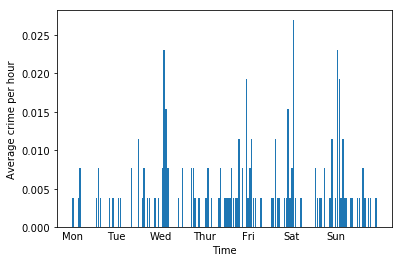

In [65]:
y_pos = np.arange(len(tuplex))
plt.bar(y_pos, result1, align='center', alpha=1)
plt.xticks(y_pos, tuplex)
plt.ylabel('Average crime per hour')
plt.xlabel('Time')
plt.tick_params(axis=u'x', which=u'both',length=0)
plt.show()

In [66]:
result2 = np.array(DataPanda['Average response time'], dtype=np.double)
result2[ result2==0 ] = np.nan

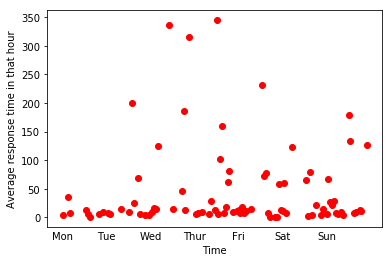

In [67]:
plt.plot(y_pos, result2,'ro')
plt.xticks(y_pos, tuplex)
plt.ylabel('Average response time in that hour')
plt.xlabel('Time')
plt.tick_params(axis=u'x', which=u'both',length=0)
plt.show()

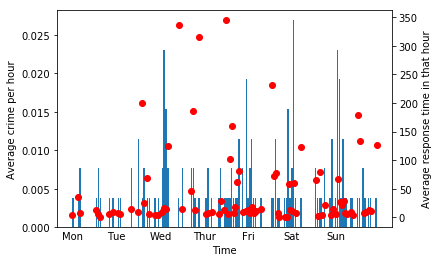

In [68]:
fig=plt.figure()
One=fig.add_subplot(111, label="1")
Two=fig.add_subplot(111, label="2", frame_on=False)
y_pos = np.arange(len(tuplex))


One.bar(y_pos, result1, align='center', alpha=1)
One.set_xlabel('Time')
One.set_ylabel('Average crime per hour')
One.set_xticks(y_pos)
One.set_xticklabels(tuplex)
One.tick_params(axis=u'x', which=u'both',length=0)
One.xaxis.tick_bottom()
One.yaxis.tick_left()

Two.plot(y_pos, result2, 'ro')
#One.set_xlabel('Time')
Two.set_ylabel('Average response time in that hour')
Two.tick_params(axis=u'x', which=u'both',length=0)
Two.set_xticks(y_pos)
Two.set_xticklabels([])
Two.xaxis.tick_bottom()
Two.yaxis.tick_right()

One.yaxis.set_label_position('left')
Two.yaxis.set_label_position('right')

plt.show()

In [69]:
fig.savefig('6400FreretSt_05miles_T1.png')

In [70]:
    address2='730 Bourbon St, New Orleans'

In [71]:
def plotdata(Location, Radius, Type):
    DataToPlot=RegionDis(Location,Radius,Type)
    DataPanda=pd.DataFrame(DataToPlot)
    DataPanda.columns = ['Average crime per hour', 'Crime Probability compared to the average level','Average response time of day',
                     'Average response time']
    result1 = np.array(DataPanda['Average crime per hour'], dtype=np.double)
    result1[ result1==0 ] = np.nan
    result2 = np.array(DataPanda['Average response time'], dtype=np.double)
    result2[ result2==0 ] = np.nan
    
    fig=plt.figure()
    One=fig.add_subplot(111, label="1")
    Two=fig.add_subplot(111, label="2", frame_on=False)
    y_pos = np.arange(len(tuplex))

    One.bar(y_pos, result1, align='center', alpha=1)
    One.set_xlabel('Time')
    One.set_ylabel('Average crime per hour')
    One.set_xticks(y_pos)
    One.set_xticklabels(tuplex)
    One.tick_params(axis=u'x', which=u'both',length=0)
    One.xaxis.tick_bottom()
    One.yaxis.tick_left()

    Two.plot(y_pos, result2, 'ro')
    #One.set_xlabel('Time')
    Two.set_ylabel('Average response time in that hour')
    Two.tick_params(axis=u'x', which=u'both',length=0)
    Two.set_xticks(y_pos)
    Two.set_xticklabels([])
    Two.xaxis.tick_bottom()
    Two.yaxis.tick_right()

    One.yaxis.set_label_position('left')
    Two.yaxis.set_label_position('right')
    
    r=str(Radius).replace(".","")

    filename=Location+'_'+r+'_T'+str(Type)+'.png'
    fig.savefig(filename)
    
    return None

In [72]:
plotdata(address2,0.1,1)

In [73]:
import psycopg2
import gmplot

In [74]:
coord

(29.9299008979592, -90.1327338979592)

In [75]:
Trial1=Walking(TableFilter(address2,0.5))

In [76]:
Trial1[0:5]

,Location,Response,TimeCreate,TypeText
80,"(29.956300375853115, -90.06310829672566)","[31, 52]",2013-01-01 00:23:19,SIMPLE ROBBERY PROPE
97,"(29.959086603945497, -90.06515403846844)","[0, 28]",2013-01-01 00:30:52,SIMPLE BATTERY
132,"(29.9594709577918, -90.06480175675452)","[0, 2]",2013-01-01 00:49:43,SIMPLE BATTERY
144,"(29.956300375853115, -90.06310829672566)","[60, 1]",2013-01-01 00:56:35,AGGRAVATED BATTERY
349,"(29.953006445057586, -90.06859136709198)",InDef,2013-01-01 02:57:45,ARMED ROBBERY WITH G


In [77]:
def MapFilter(Location, Radius, Time, Type):
    Table=TableFilter(Location, Radius)
    if Type==1:
        temp=Walking(Table)
    if Type==2:
        temp=Housing(Table)
    if Type==3:
        temp=Driving(Table)
        
    timetemp=datetime.strptime(Time,'%m/%d/%Y %H:%M:%S')
    myday=timetemp.weekday()
    myhour=timetemp.hour

    flag=[]
        
    for i in range(len(temp.TimeCreate.values)):
        Response=temp.Response.values[i]
        sth=temp.TimeCreate.values[i]
        time=datetime.utcfromtimestamp(sth.tolist()/1e9)
        W=time.weekday()       #weekday
        H=time.hour            #hour
        if W==myday and H==myhour:
            flag.append(1==1)
        else:
            flag.append(0==1)
    
    return temp[flag]

In [78]:
Trial1=MapFilter(address2, 0.5, '01/25/2018 13:30:00',1)

In [79]:
Trial1

,Location,Response,TimeCreate,TypeText
169792,"(29.959011818869275, -90.06995851106261)",InDef,2013-05-16 13:21:56,SIMPLE BATTERY DOMES
169820,"(29.955108575881717, -90.06727941160821)","[45, 32]",2013-05-16 13:51:39,SIMPLE BATTERY
378532,"(29.956718055664766, -90.06279033122009)",InDef,2013-10-24 13:57:35,SIMPLE BATTERY
405338,"(29.959258227125535, -90.06984485605712)",InDef,2013-11-14 13:24:29,SIMPLE BATTERY
576668,"(29.95708097, -90.06686191)","[371, 1]",2014-04-03 13:08:45,SIMPLE BATTERY
631514,"(29.95992189, -90.05997213)","[8, 13]",2014-05-15 13:58:14,SIMPLE BATTERY
658604,"(29.95641737, -90.06603452)",InDef,2014-06-05 13:43:50,"SIMPLE ROBBERY, PROPERTY SNATCHING"
730199,"(29.96519204, -90.06268104)",InDef,2014-07-31 13:35:50,SIMPLE BATTERY
747927,"(29.96149927, -90.06598103)","[147, 57]",2014-08-14 13:36:33,SIMPLE BATTERY
889985,"(29.95754612, -90.06205841)","[27, 3]",2014-12-11 13:11:51,SIMPLE ASSAULT


In [84]:
def mapplotter(t):
    latitudes=[]
    longitudes=[]
    for i in t.Location:
        latitudes.append(eval(i)[0])
        longitudes.append(eval(i)[1])
        
    gmap=gmplot.GoogleMapPlotter(latitudes[0],longitudes[1],16)
    
    gmap.scatter(latitudes, longitudes, '#3B0B39', size=20, marker=False)
    gmap.draw('result2.html')
    
    return None

In [81]:
mapplotter(Trial1)

In [82]:
Trial1

,Location,Response,TimeCreate,TypeText
169792,"(29.959011818869275, -90.06995851106261)",InDef,2013-05-16 13:21:56,SIMPLE BATTERY DOMES
169820,"(29.955108575881717, -90.06727941160821)","[45, 32]",2013-05-16 13:51:39,SIMPLE BATTERY
378532,"(29.956718055664766, -90.06279033122009)",InDef,2013-10-24 13:57:35,SIMPLE BATTERY
405338,"(29.959258227125535, -90.06984485605712)",InDef,2013-11-14 13:24:29,SIMPLE BATTERY
576668,"(29.95708097, -90.06686191)","[371, 1]",2014-04-03 13:08:45,SIMPLE BATTERY
631514,"(29.95992189, -90.05997213)","[8, 13]",2014-05-15 13:58:14,SIMPLE BATTERY
658604,"(29.95641737, -90.06603452)",InDef,2014-06-05 13:43:50,"SIMPLE ROBBERY, PROPERTY SNATCHING"
730199,"(29.96519204, -90.06268104)",InDef,2014-07-31 13:35:50,SIMPLE BATTERY
747927,"(29.96149927, -90.06598103)","[147, 57]",2014-08-14 13:36:33,SIMPLE BATTERY
889985,"(29.95754612, -90.06205841)","[27, 3]",2014-12-11 13:11:51,SIMPLE ASSAULT


In [83]:
Trial2=MapFilter(address2, 0.5, '01/25/2018 22:30:00',1)

In [86]:
mapplotter(Trial2)